In [1]:
from include.customer_segmentation_functions import *

dataset: https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci/data

In [2]:
data_file= R"DataSets\online_retail_II.csv"
main_data= pd.read_csv(data_file,encoding ='cp1252')
data= main_data



https://www.kaggle.com/datasets/allen-institute-for-ai/CORD-19-research-challenge

# `General view of the data:`

In [3]:
data.sample(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
667605,548553,23231,WRAP DOILEY DESIGN,25,2011-04-01 09:19:00,0.42,12523.0,France
3613,489743,21889,WOODEN BOX OF DOMINOES,6,2009-12-02 11:24:00,1.25,16550.0,United Kingdom
576660,540645,40016,CHINESE DRAGON PAPER LANTERNS,144,2011-01-10 14:20:00,0.42,14060.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 326342 to 887642
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      10000 non-null  object 
 1   StockCode    10000 non-null  object 
 2   Description  9967 non-null   object 
 3   Quantity     10000 non-null  int64  
 4   InvoiceDate  10000 non-null  object 
 5   Price        10000 non-null  float64
 6   Customer ID  7729 non-null   float64
 7   Country      10000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 703.1+ KB


In [5]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Invoice,10000,7385,537823,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,10000,2709,85099B,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,9967,2881,REGENCY CAKESTAND 3 TIER,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,10000.0,NaN,NaN,NaN,9.58,39.428742,-1400.0,1.0,3.0,10.0,1284.0
InvoiceDate,10000,7277,2010-12-08 14:25:00,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10000.0,NaN,NaN,NaN,4.25839,28.768874,0.0,1.25,2.1,4.15,1588.51
Customer ID,7729.0,NaN,NaN,NaN,15310.822616,1715.537726,12346.0,13870.0,15210.0,16818.0,18287.0
Country,10000,36,United Kingdom,9198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# `Data Preprocessing:`
which involves removing null data, duplicates, unwanted column, etc

In [6]:
#cahnging col name
data.rename(columns = {x:x.lower().replace(' ','') for x in data.columns}, inplace = True)

#change datatype
data['quantity'] = pd.to_numeric(data['quantity'])
data['price'] = pd.to_numeric(data['price'])
data["invoicedate"]=pd.to_datetime(data["invoicedate"])

#removing extra white spaces
data["description"]= data["description"].str.strip()
data.sample(3)

,invoice,stockcode,description,quantity,invoicedate,price,customerid,country
709782,552687,21937,STRAWBERRY PICNIC BAG,1,2011-05-10 15:09:00,5.79,NaN,United Kingdom
497796,535952,22469,HEART OF WICKER SMALL,4,2010-11-29 12:06:00,4.21,NaN,United Kingdom
224490,511093,20990,SPRING FLOWER CHOPSTICKS SET/5,4,2010-06-06 15:22:00,1.95,17920.0,United Kingdom


In [7]:
for col_name in ["stockcode", "description", "quantity", "price", "customerid"]:
    get_value_counts(data, col_name)

****************************************
column name: stockcode
****************************************
    number of 'NaN' value: 0
percentage of 'NaN' value: 0.0%
   number of unique value: 2709
    number of total value: 10000 (including none)
   number of total Values: 10000


*******************************************
column name: description
*******************************************
    number of 'NaN' value: 33
percentage of 'NaN' value: 0.33%
   number of unique value: 2868
    number of total value: 10000 (including none)
   number of total Values: 9967


**************************************
column name: quantity
**************************************
    number of 'NaN' value: 0
percentage of 'NaN' value: 0.0%
   number of unique value: 123
    number of total value: 10000 (including none)
   number of total Values: 10000


********************************
column name: price
********************************
    number of 'NaN' value: 0
percentage of 'NaN' value: 0.0%
  

In [8]:
data= drop_nun_val_in_col(data, "customerid")
data= drop_canceled_items(data)

***************************************************************
droping rows where customerid = NaN
***************************************************************
*Row counts before droping 'NaN' values: 10000
* Row counts after droping 'NaN' values: 7729
----------------------------------------
*                      Total rows droped: 2271
*              Percentage of droped rows: 22.71%


******************************************************
droping rows of canceled items
******************************************************
*Number of rows before droping canceled items: 7729
* Number of rows after droping canceled items: 7557


----------------------------------------
*                           Total rows droped: 172
*                   Percentage of droped rows: 2.23%




## checking stockcode and description relationships

In [9]:
check_relationship_type(data, "stockcode", "description")

***********************************************************************************************
Checking relationship for 	stockcode -to- description
***********************************************************************************************
*many-to-many


In [10]:
descr= recheck_relationship_type(data, "description", "stockcode")
stockc= recheck_relationship_type(data, "stockcode", "description")

***************************************************************************************************
rechecking relationship for 	description -to- stockcode
***************************************************************************************************


100%|██████████| 2462/2462 [00:04<00:00, 551.27it/s]


*6 'description' are related to more than one 'stockcode'
['BATHROOM METAL SIGN', 'METAL SIGN,CUPCAKE SINGLE HOOK', 'SWEETHEART WIRE WALL TIDY', 'SET OF 4 FAIRY CAKE PLACEMATS', 'RETRO PLASTIC DAISY TRAY', 'COLOURING PENCILS BROWN TUBE']
***************************************************************************************************
rechecking relationship for 	stockcode -to- description
***************************************************************************************************


100%|██████████| 2310/2310 [00:03<00:00, 632.12it/s]

*150 'stockcode' are related to more than one 'description'
['85099B', '85232B', '84997D', '20724', '21210', '21243', '84997B', '22386', '22353', '22291', '22191', '21232', '22954', '21156', '21980', '48116', '20983', '22414', '21485', '21787', '22983', '48194', '22349', '85014B', '21955', '22937', '84946', '21818', '22227', '22984', '21154', '21533', '22310', '21080', '20718', '22384', '21238', '22832', '20685', '21155', '22072', '21239', '48138', '22383', '23231', '22365', '21928', '47591B', '20682', '20975', '21212', '21584', '22356', '84969', '22242', '22732', '22139', '20677', '20676', '20979', '22059', '21495', '23209', '20750', '21500', '22083', '22677', '37342', '21986', '22045', '22197', '21531', '84247E', '22892', '21843', '84997A', '22199', '22355', '22080', '21561', '21217', '23126', '22090', '21122', '23525', '48184', '85184C', '22333', '22899', '23283', '48173C', '21524', '47591D', '21844', '22246', '48187', '21242', '48111', '21535', '22602', '20914', '23534', '20754', '

In [11]:
print(len(stockc))
for val in random.sample(stockc, 5):
    print(f"{val}: {data[data["stockcode"]==val]["description"].unique()}")

150
21156: ['RED SPOTTY CHILDS APRON' 'RETROSPOT CHILDRENS APRON']
23237: ['SET OF 4 KNICK KNACK TINS LEAF' 'SET OF 4 KNICK KNACK TINS LEAVES']
21843: ['RED RETROSPOT CAKE STAND' 'RETRO SPOT CAKE STAND']
22383: ['LUNCH BAG SUKI  DESIGN' 'LUNCH BAG SUKI DESIGN' 'LUNCHBAG SUKI  DESIGN']
21155: ['RED RETROSPOT PEG BAG' 'RED SPOTTY PEG BAG']


In [12]:
print(len(descr))
for val in random.sample(descr, 5):
    print(f"{val}: {data[data["description"]==val]["stockcode"].unique()}")

6
BATHROOM METAL SIGN: ['82580' '21171']
SET OF 4 FAIRY CAKE PLACEMATS: ['84509G' '84509B']
RETRO PLASTIC DAISY TRAY: ['79191D' '79190D']
COLOURING PENCILS BROWN TUBE: ['10135' '10133']
METAL SIGN,CUPCAKE SINGLE HOOK: ['82613C' '82613B']


##### Here we can see that the stock code and product description don't have a 'one-to-one' relationship due to errors such as typing mistakes and the use of different synonymous words for the same product code. However, we can safely assume that they indeed have a one-to-one relationship and we can drop one of this 2 columns

## checking customer and country relationships(if any customer is associated with more than one country)
very few customer made purched from more than one contry

In [13]:
check_relationship_type(data, "customerid", "customerid")

***********************************************************************************************
Checking relationship for 	customerid -to- customerid
***********************************************************************************************
*many-to-many


In [14]:
cust_list= recheck_relationship_type(data, "customerid", "country")

**********************************************************************************************
rechecking relationship for 	customerid -to- country
**********************************************************************************************


100%|██████████| 2660/2660 [00:02<00:00, 1260.68it/s]

*2 'customerid' are related to more than one 'country'
[12455.0, 12417.0]


In [16]:
# print(len(cust_list))
# for val in random.sample(cust_list, 5):
#     print(f"{val}: {data[data["customerid"]==val]["country"].unique()}")

In [17]:
data.drop(columns=['stockcode'], inplace= True)

#

In [18]:
data['customerid']= data['customerid'].astype(np.int64).astype("string")
data['quantity']= data['quantity'].astype(np.int64)
data["invoicetime"]= data["invoicedate"].dt.time
data["invoicedate"]= data["invoicedate"].dt.date

##### cleaning quantity and unitprice
##### since we have quantity and unit price, we will calculate the total price 

In [19]:
print(data[data["price"]<0]["price"].count())
print(data[data["quantity"]<0]["quantity"].count())

0
0


In [20]:
data["totalprice"]= data["quantity"]* data["price"]
data.sample(3)

,invoice,description,quantity,invoicedate,price,customerid,country,invoicetime,totalprice
264591,514972,PACK OF 72 RETRO SPOT CAKE CASES,24,2010-07-07,0.55,16873,United Kingdom,12:34:00,13.20
879414,567853,CHILLI LIGHTS,2,2011-09-22,5.75,15484,United Kingdom,13:31:00,11.50
779631,559297,LOVE HEART TRINKET POT,8,2011-07-07,0.39,16743,United Kingdom,12:36:00,3.12


In [21]:
print(f"before cleaning 0 price iteams:\n{data[data["price"] ==0]}")
data= data[data["price"] !=0.0]

before cleaning 0 price iteams:
       invoice              description  quantity invoicedate  price customerid         country invoicetime  totalprice
232526  511902  HANGING METAL BIRD BATH         1  2010-06-11    0.0      12748  United Kingdom    11:12:00         0.0
971586  574879       RED KITCHEN SCALES         2  2011-11-07    0.0      13014  United Kingdom    13:22:00         0.0
453705  532470     IVORY KITCHEN SCALES         2  2010-11-12    0.0      12647         Germany    11:41:00         0.0


In [22]:
print(f"row count before removing duplicates:{len(data)}")
data.drop_duplicates(inplace= True)
print(f" row count after removing duplicates:{len(data)}")

row count before removing duplicates:7554
 row count after removing duplicates:7552


# `Exploratory data analysis (EDA):`

**********************************************************************************************************
Descriptive Stats for ['quantity', 'price', 'totalprice'] :
**********************************************************************************************************
             count       mean        std   min   25%    50%      75%      max      IQR  lower bound  upper bound
quantity    7552.0  12.659958  37.648748  1.00  2.00   5.00  12.0000  1284.00  10.0000    -13.00000     27.00000
price       7552.0   3.019027   5.664942  0.06  1.25   1.95   3.7500   295.00   2.5000     -2.50000      7.50000
totalprice  7552.0  22.265745  75.214570  0.19  4.95  11.90  19.5625  4121.64  14.6125    -16.96875     41.48125 




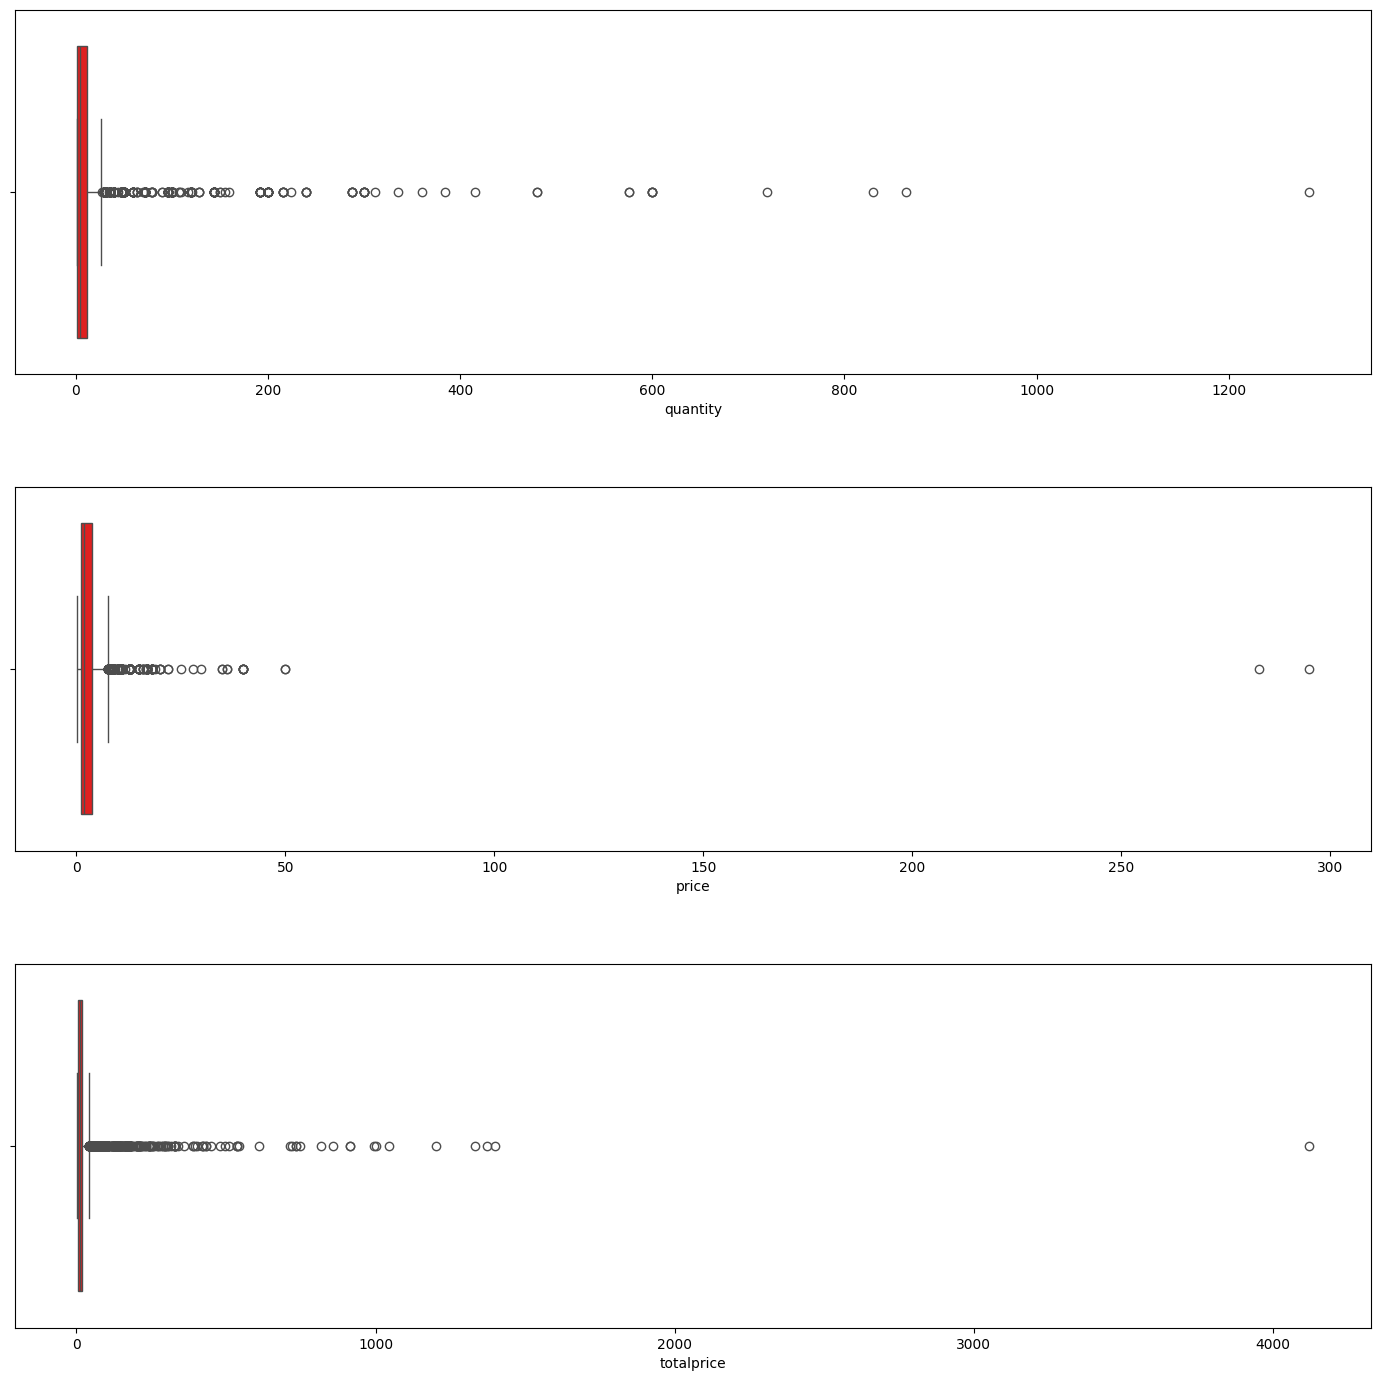

*******************************************************************************************************************
Descriptive Stats for ['description', 'customerid', 'country'] :
*******************************************************************************************************************
            count unique                       top  freq
description  7552   2461  REGENCY CAKESTAND 3 TIER    38
customerid   7552   2660                     17841   152
country      7552     34            United Kingdom  6812 




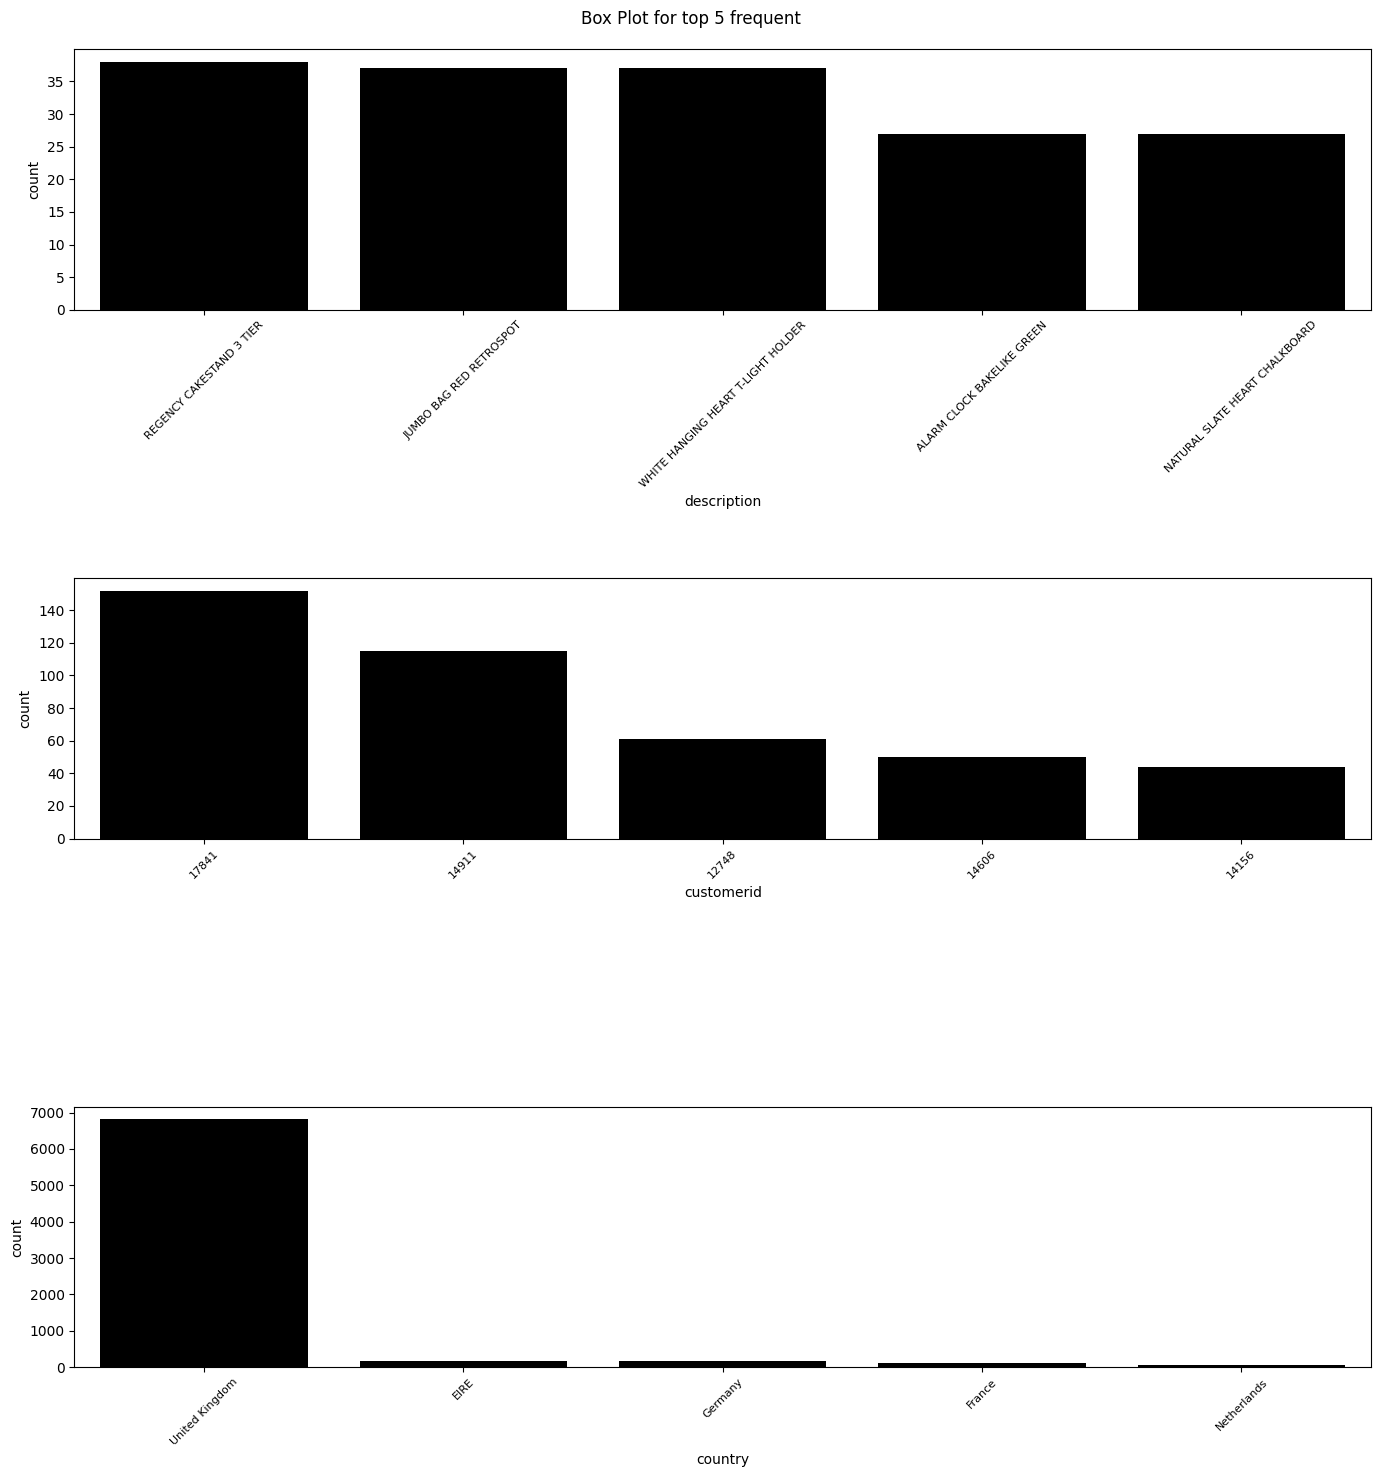

In [23]:
get_descriptive_stats(data, ['quantity', 'price', 'totalprice', 'description', 'customerid', 'country'] )

# RFM

****************************************
RMF dataset prepartion
****************************************
*Date starts from: 2009-12-01 to 2011-12-09
*We are only conside the customers who made more than one purchase
*Here:
    T --> Interpurchase Time
    L --> Shopping Cycle
    F --> Frequency
    T1 --> First purchase
    Tn --> Last purchase

    T = L/(F-1) = (Tn - T1)/(F-1)
    
Sample data:
      customerid  recency  frequency  monetary  interpurchase_time
1791      16326       61          2     30.35                   7
1171      14961       81          5     87.50                 128
589       13615      399          2     37.65                  53


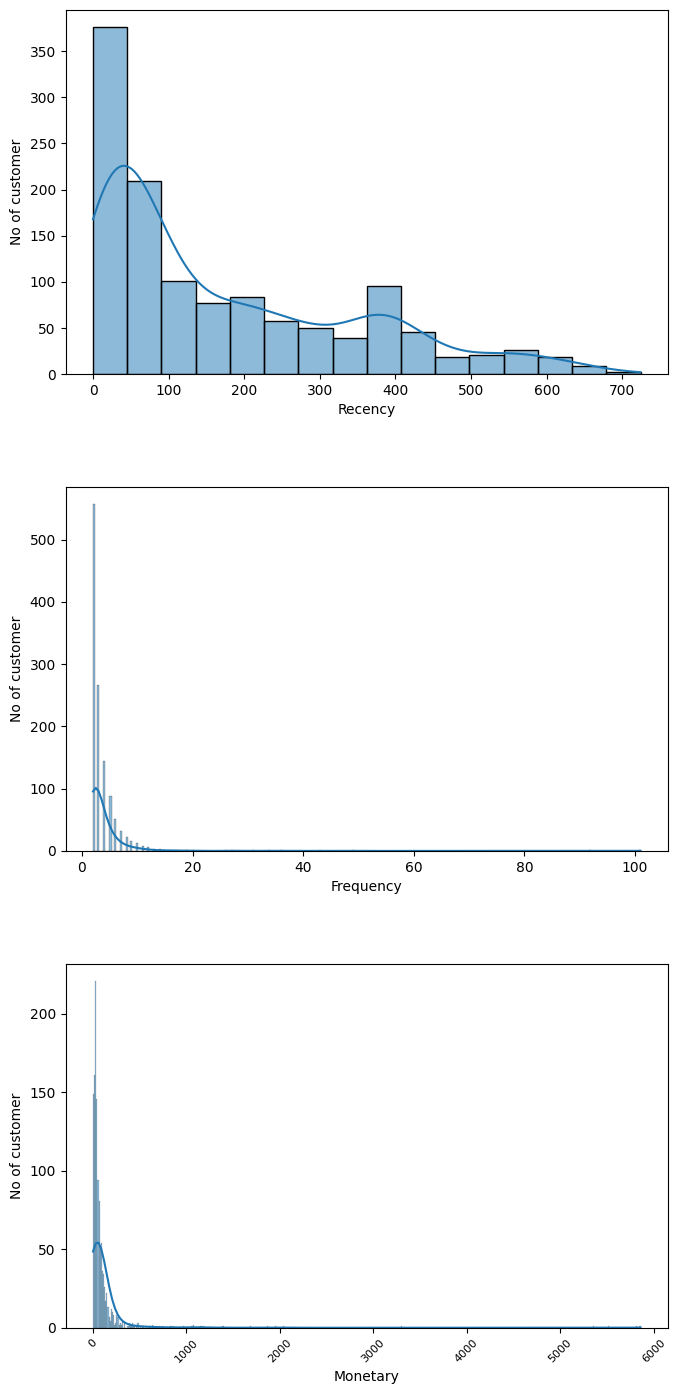

In [24]:
RFM= get_rmf_data_set(data)

In [34]:
RFM_with_score= rfm_score_calculate(RFM)

*************************************************
dfT score :                
*************************************************
*calculating R,F,M,T score based on quartiles
rfm_score= R+F+M
*rfm_score: Label
       > 1: Silver
       > 3: Gold
       > 5: Platinum
       > 9: Diamond
*max rmf_score: 12
min rmf_score: 4
sample:
     customerid  recency  frequency  monetary  interpurchase_time  R  F  M  T  rfm_score     label
1404      15453       56          3     21.78                  43  2  3  1  1          6  Platinum
1826      16395       60          6     31.20                  65  2  4  2  2          8  Platinum
124       12610       22          2     34.80                  52  1  2  2  2          5      Gold
1392      15426       33          3     10.08                 184  2  3  1  4          6  Platinum


In [ ]:
barplot = dict(RFM_with_score['label'].value_counts())
bar_names = list(barplot.keys())
bar_values = list(barplot.values())
plt.bar(bar_names,bar_values)
print(pd.DataFrame(barplot, index=[' ']))